# Title 
An Investigation into Titanic Survival Rates Based on Class and Companionship

# Introduction

My project investigates the relationship between class and travel status (alone or with others) and survival of the 1912 Titanic disaster. This investigation uses data from individual passenger records from those aboard the Titanic. Class relates to the passenger class (first, second, third) that each passenger was in, while alone (No, yes) relates to wether the passenger boarded the Titanic with either a child, spouse, or parent.

My investigation into the Titanic disaster meant I was looking at the deaths of many passengers. For me, it was important to not let these real human lives and deaths turn into just statistics and instead remain the human element of what I was analyzing.


$\color{green}{\text{Research question:  }}$ 


How class and embarking as a solo passenger or with companions affects survivability on the Titanic.


---




# Analysis

To prepare my data for use I first dropped any columns that did not have relevance to my question. This left me with only four variables: survived, class, pclass, alone. My final step was combining pclass and class to create a more succinct dataframe.

**Univariate (graphical and non-graphical)**


| Covariance     | survived |  alone  | class |
| ----------- | ----------- | -------- ||
| survived     | 1.000000      | -0.204132 |-0.13741|
| alone     |     -0.204132    | 1.000000 |0.055632|
|class     |     -0.13741    | 0.055632 |1.000000|

-

| Correlation     | survived  |  alone    |class   |
| ----------- | -----------   | --------  |--------|
| survived    | 0.236973      | -0.048649 |-0.13741|
| alone       |     -0.048649 | 0.239676  |0.055632|
|class        |     -0.13741  | 0.055632  |0.699511|

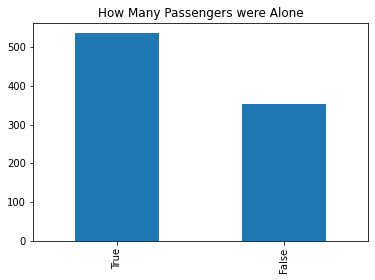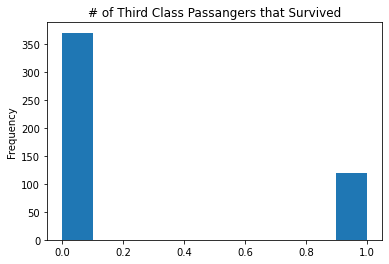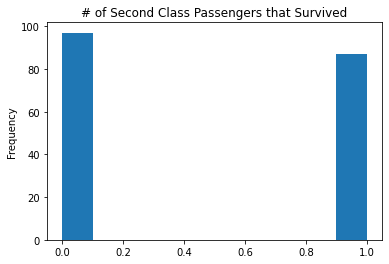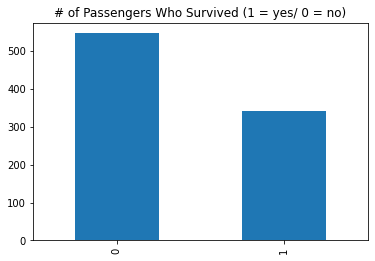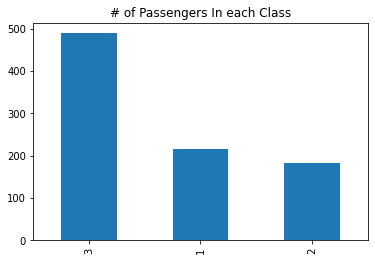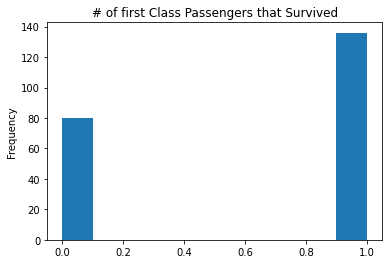

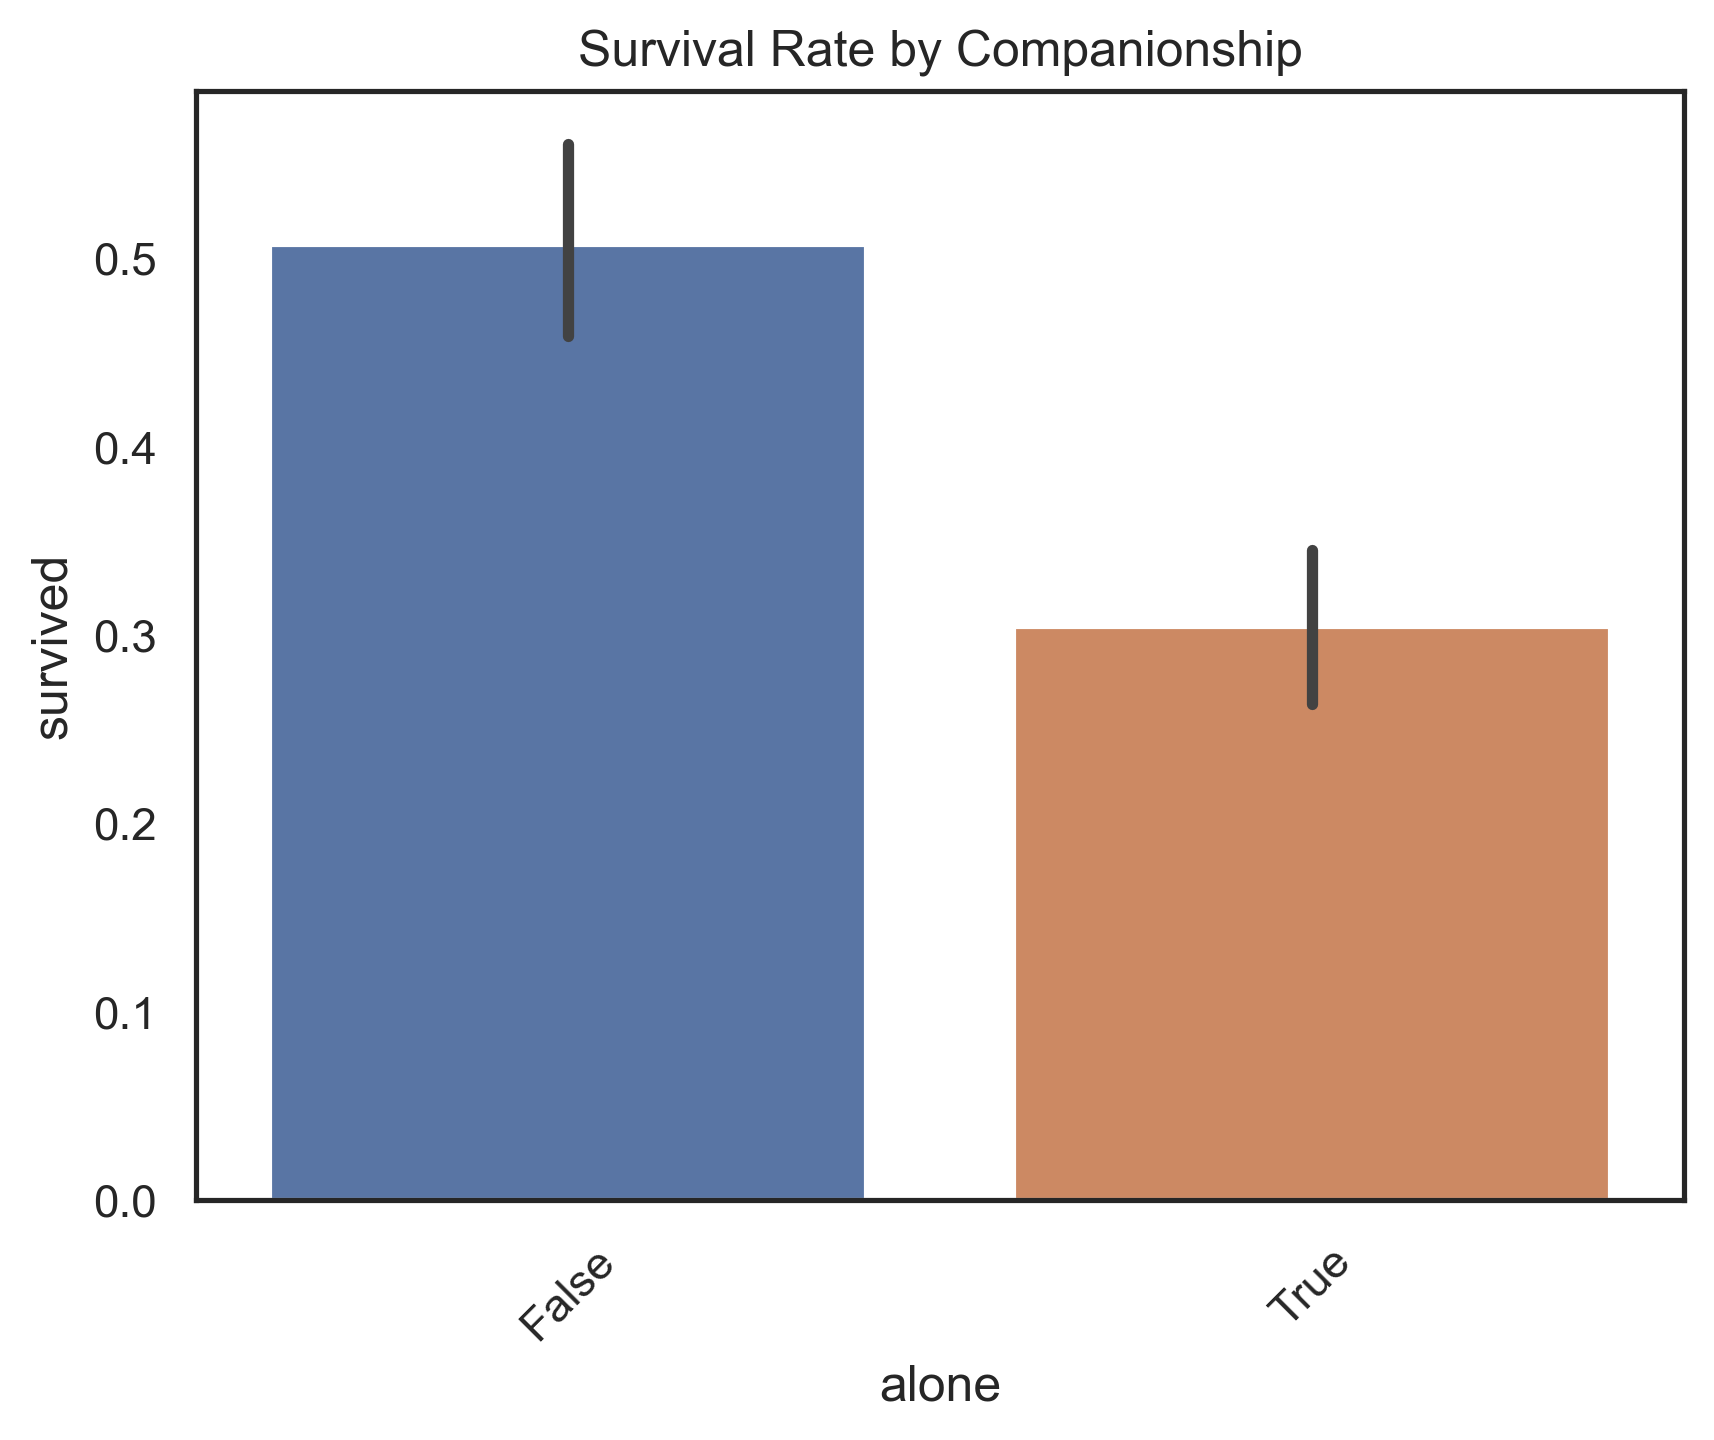


In [4]:
from IPython.display import Image
  
# get the image
Image(url="# of first Class Passengers that Survived.png", width=300, height=300)


My EDA showed that more passengers were alone that traveling with companions and that most people did not survive, with the lower the class the greater proportion of passengers who died - with first class being the only class were more people survived than died.

Furthermore, most people were within third class, however, second class had less than first.

There is a negative covariance between alone and survived, class and survived, and a positive covariance between class and alone. This indicates that as one of these variables changes the other changes inversely.

There is a negative correlation between alone and survived, class and survived, and a positive correlation between alone and class. This indicates that as one of these variables changes the other changes in the same direction.

Finally the value_counts of each variable showed there were 889 observations for each.


**Bivariate (graphical and non-graphical)**



---
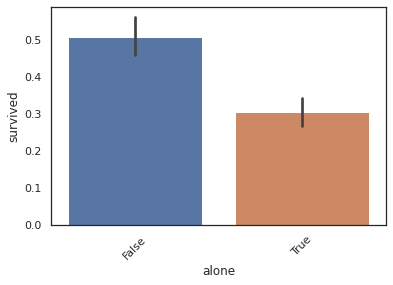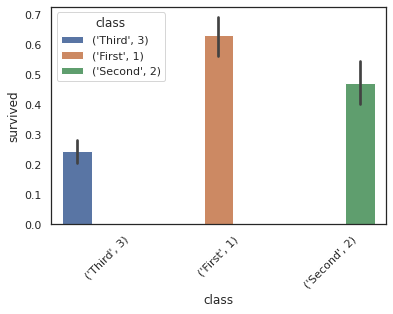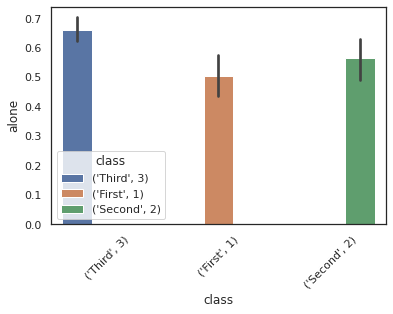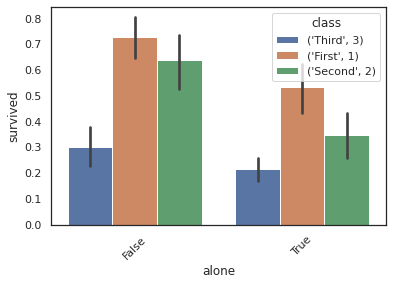

These plots all confirm that being alone had a lower chance of survival while the better the class the better the chance of survival. For instance, plot 2 shows that survival by class was: first, second, third. 

**The statistical model for this analysis is:**

Survived = Class + Alone

$\color{green}{\text{Variables:  }}$ survived, class, alone

$\color{green}{\text{Model:  }}$ Multiple logistic regression

$\color{green}{\text{Response Variable:  }}$ Survived - Categorical (0 = False, 1 = True)

$\color{green}{\text{Predictor Variable:  }}$: Class, alone (all categorical)

**Logistic Regression Assumptions:**

1.      $\color{blue}{\text{Appropriate outcome type:  }}$
 
The logistic regression type used (binary, multinomial, or ordinal) must correspond to the outcome (dependent) variable in the dataset.

Conclusion: Although the dytpe is int64, the only options are 0 and 1 (no/yes) and therefore meet the assumption.

2.      $\color{blue}{\text{Linearity of independent variables and log-odds:  }}$
 
The relationship between the logit (aka log-odds) of the outcome and each continuous independent variable is linear.

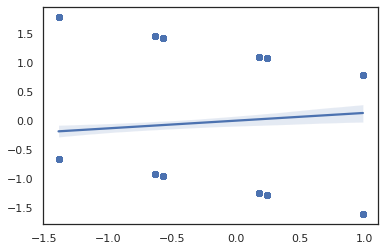

Evidence Checked: We can check for this using the Harvey collier test and regplot.
 
Conclusion: The straight, relatively horizontal line provides good evidence of the linearity of the residuals. Furthermore, statistic=-0.5136335476486579 and the pvalue=0.6076364267751069, which greater than 0.05 which means linearity is met.

3.     $\color{blue}{\text{ No strongly influential outliers:  }}$

 
Logistic regression presupposes that no highly influential outlier data points exist, as they alter the model's outcome and accuracy.
 
 

Evidence Checked: By checking if any resid_dev values were greater/less than 3 or -3
 
Conclusion: None, therefore the assumption is met.

4.     $\color{blue}{\text{ Absence of multicollinearity:  }}$

 
Multicollinearity occurs when the data contains highly associated independent variables which can affect the accuracy of the estimated coefficient and thus makes the model less efficient and weaker.

vif = [1.0188073981156203, 1.0188073981156205]

 
Evidence Checked: In order to determine if X variables are correlated in a regression model obtain the 'Variance Inflation Factor (VIF)
 
Conclusion: Multicollinearity not found


5.     $\color{blue}{\text{ Independence of observations:  }}$


 
The observations must be independent of each other, i.e., they should not come from repeated or paired data.
 
Evidence Checked: The Titanic model dataset consists of individual passenger records.

Conclusion: Thus, the independence assumption is automatically met.

 
6.     $\color{blue}{\text{ Sufficiently large sample size:  }}$
 
There should be an adequate number of observations for each independent variable in the dataset to avoid creating an overfit model.
 


Evidence Checked: My model takes in 889 observations (derivied from value_counts

Conclusion:  889 is significant and meets the assumption.



---

# Results

Each of these predicator values has a p-value of 0, which indicates they are very significant and impact survival greatly. Each test statistics is negative which indicate that these predicator variables are respectively, -5 and -9.12 standard deviations below the survival mean.

The odds ratio for pclass is 0.443439. This is less than 1, which indicates as class increases survival decreases. Thus, the odds of surviving are .44 times as likely as the class increases by one unit. The odds ratio for alone is 0.471840. Therefore, the odds of surving are .47 times as likely when one is alone.

The log likelihood is -529.02, which is low but without another model to compare to doesn’t mean much. However, the LLR p-value is incredibly small which indicates we can be very certain in the results of the model.




---






---

# Discussion
This model shows that as class increases (1 -> 2 -> 3) and if a passenger embarked alone, the chances of survival would go down. This means to have the highest chance of surviving the Titanic sinking, one would have to be in first class and traveling with either a child or parent.


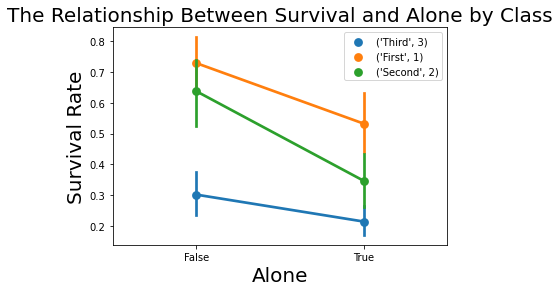

This plot shows this relationship with those in First class and not alone surviving the most and those in third class and alone surviving the least.

These results can be misused by taking the alone variable at face value. For instance, while it is true that on average being alone made one more likely to not survive, to depended on the type of relationship. For instance, parent/child relationships had a very high survival rate, while spouse/sibling relationships did not. Therefore, the data is somewhat skewed and to present it without a deeper understanding of why companionship increases survival would be ethically wrong.

An interesting next step would be to look at how gender and what the relationship between passengers who travelled together was. For instance, most likely women and those with children would have a much higher survival rate than single men. This would simply be because women and children were prioritized oven men for lifeboats. Using logistic regression to confirm or reject this hypothesis would be very interesting.